# Customer Churn Analytics

In [44]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.family': "Open Sans", 'font.size': 16})
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})

In [45]:
# read data
df = pd.read_csv("data/telco_customer_churn.csv", na_values="")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# check features
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
# check empty field in the dataset
df = df.replace(' ', np.nan)
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [48]:
# drop any row with null
df = df.dropna()
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
# check the type of each feature
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [50]:
# convert into appropriate type
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: float(x))

In [51]:
df = df.drop(columns=["customerID"])
df["count"] = 1
df["churn"] = df["Churn"].apply(lambda x: "Churn" if x == "Yes" else  "NoChurn")


### Churn Statistics

<AxesSubplot:ylabel='count'>

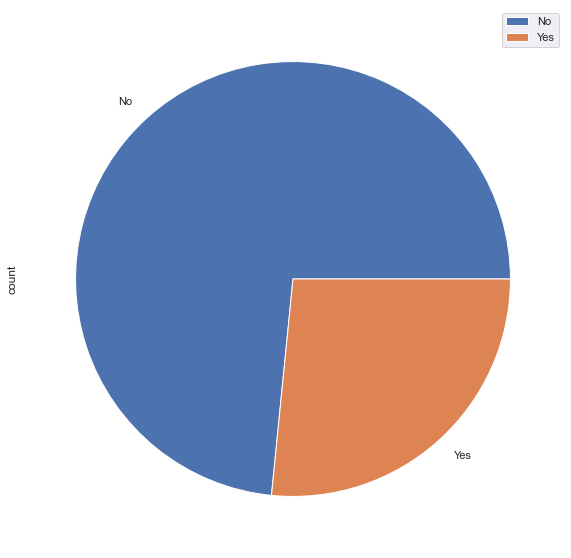

In [52]:
df.groupby(['Churn']).sum().plot(kind='pie', y='count')


## Analyzing Churn Likelihood

### Churn Likelihood - Gender

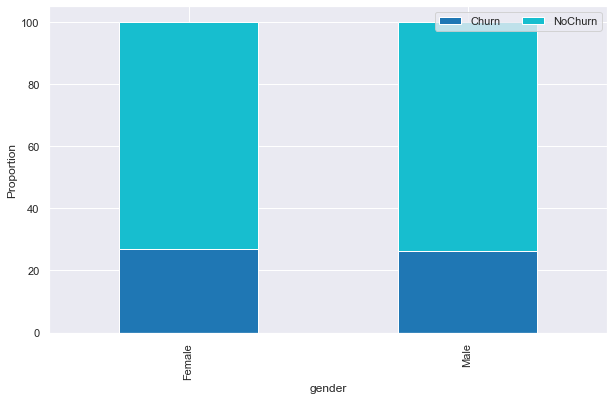

In [59]:
cross_tab_prop = pd.crosstab(index=df['gender'],
                             columns=df['churn'],
                             normalize="index")

cross_tab_prop *= 100

cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.ylabel("Percentage")
plt.show()


### Churn Likelihood - Seniority of Citizen

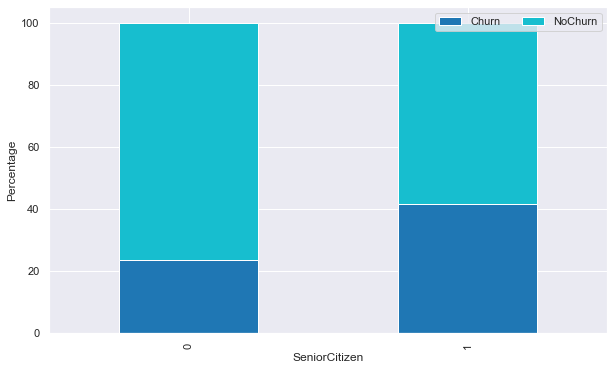

In [60]:
cross_tab_prop = pd.crosstab(index=df['SeniorCitizen'],
                             columns=df['churn'],
                             normalize="index")

cross_tab_prop *= 100


cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.ylabel("Percentage")
plt.show()


### Churn Likelihood - Internet Service

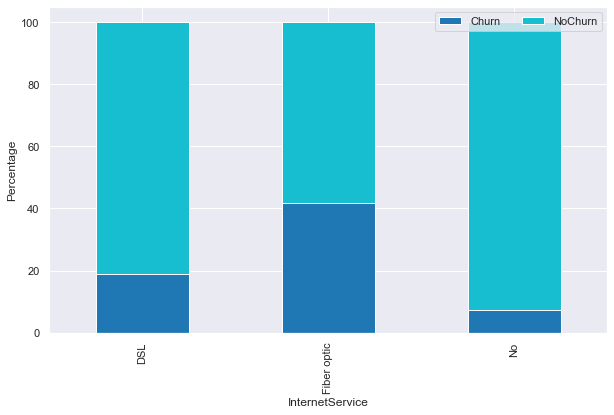

In [61]:
cross_tab_prop = pd.crosstab(index=df['InternetService'],
                             columns=df['churn'],
                             normalize="index")

cross_tab_prop *= 100


cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.ylabel("Percentage")
plt.show()


### Churn Likelihood - Contract

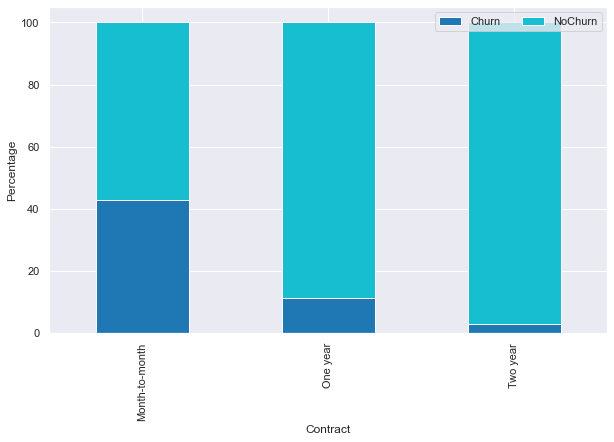

In [62]:
cross_tab_prop = pd.crosstab(index=df['Contract'],
                             columns=df['churn'],
                             normalize="index")

cross_tab_prop *= 100


cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.ylabel("Percentage")
plt.show()


### Churn Likelihood - Monthly Charges

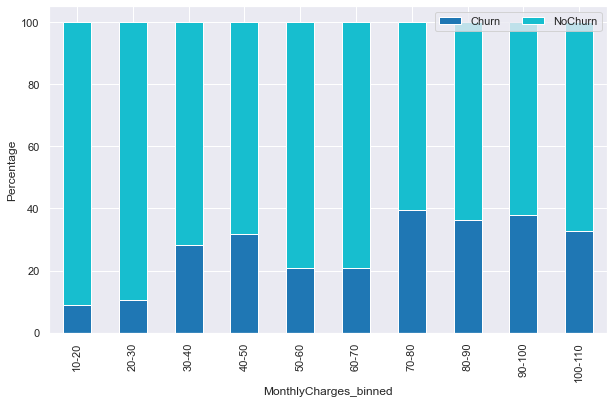

In [63]:
# https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
# https://stackoverflow.com/questions/45273731/binning-a-column-with-python-pandas

bins = list(range(0, 12))
bins = [10*x for x in bins]
labels = []
for i in range(len(bins)-1):
    labels.append(f"{bins[i]}-{bins[i+1]}")

df['MonthlyCharges_binned'] = pd.cut(
    df['MonthlyCharges'], bins=bins, labels=labels)

cross_tab_prop = pd.crosstab(index=df['MonthlyCharges_binned'],
                             columns=df['churn'],
                             normalize="index")

cross_tab_prop *= 100


cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.ylabel("Percentage")
plt.show()


## Predicting using Machine Learning

### Converting Categorical Feature into Numerical Feature

In [64]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)

ori_feature_cols = [
    "SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges", "Churn"
]

df_ori = df[ori_feature_cols]

ohe_feature_cols = [
    "gender", "InternetService", "Contract", "PaymentMethod",
    "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

df_ohe = df[ohe_feature_cols]

for col_name in ohe_feature_cols:
    df_ohe[col_name] = df_ohe[col_name].astype('category')

df_ohe = pd.get_dummies(df_ohe)


ord_feature_cols = [

]

ord_encoder = OrdinalEncoder()

df_ord = df[ord_feature_cols]


ord_features = ord_encoder.fit_transform(df_ord)

df_ord = pd.DataFrame(ord_features, columns=ord_feature_cols)


<ipython-input-64-9c350a15662c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ohe[col_name] = df_ohe[col_name].astype('category')


In [65]:
df = pd.concat([df_ori, df_ohe, df_ord], axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,2.0,53.85,108.15,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,2.0,70.70,151.65,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
